In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fbprophet import Prophet

In [3]:
df=pd.read_csv('Alcohol_Sales.csv')

In [4]:
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [5]:
df.columns=['ds','y']

In [7]:
df['ds']=pd.to_datetime(df['ds'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      325 non-null    datetime64[ns]
 1   y       325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [9]:
m=Prophet()

In [10]:
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
#placeholder to hold future predictions
future=m.make_future_dataframe(periods=24,freq='MS')

In [12]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [13]:
future.tail()

,ds
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01
348,2021-01-01


In [14]:
results=m.predict(future)

In [15]:
results

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,3992.196194,1530.192227,2711.245458,3992.196194,3992.196194,-1861.068265,-1861.068265,-1861.068265,-1861.068265,-1861.068265,-1861.068265,0.0,0.0,0.0,2131.127929
1,1992-02-01,4006.484520,2161.817548,3352.661758,4006.484520,4006.484520,-1242.708754,-1242.708754,-1242.708754,-1242.708754,-1242.708754,-1242.708754,0.0,0.0,0.0,2763.775766
2,1992-03-01,4019.851020,3223.085042,4466.477140,4019.851020,4019.851020,-150.627740,-150.627740,-150.627740,-150.627740,-150.627740,-150.627740,0.0,0.0,0.0,3869.223279
3,1992-04-01,4034.139346,3249.163608,4415.434528,4034.139346,4034.139346,-218.629518,-218.629518,-218.629518,-218.629518,-218.629518,-218.629518,0.0,0.0,0.0,3815.509828
4,1992-05-01,4047.966759,4017.510988,5206.878277,4047.966759,4047.966759,568.411786,568.411786,568.411786,568.411786,568.411786,568.411786,0.0,0.0,0.0,4616.378545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2020-09-01,13849.585649,13046.456455,14237.937233,13833.208768,13868.271301,-193.347034,-193.347034,-193.347034,-193.347034,-193.347034,-193.347034,0.0,0.0,0.0,13656.238615
345,2020-10-01,13885.736356,13468.726672,14749.639129,13867.642010,13905.755960,220.498151,220.498151,220.498151,220.498151,220.498151,220.498151,0.0,0.0,0.0,14106.234507
346,2020-11-01,13923.092086,13678.852890,14849.985573,13903.008225,13944.935707,309.994200,309.994200,309.994200,309.994200,309.994200,309.994200,0.0,0.0,0.0,14233.086287
347,2020-12-01,13959.242793,14638.980938,15855.245607,13937.283710,13982.828225,1272.265317,1272.265317,1272.265317,1272.265317,1272.265317,1272.265317,0.0,0.0,0.0,15231.508110


In [16]:
results[['ds','yhat_upper','yhat_lower','yhat',]]

,ds,yhat_upper,yhat_lower,yhat
0,1992-01-01,2711.245458,1530.192227,2131.127929
1,1992-02-01,3352.661758,2161.817548,2763.775766
2,1992-03-01,4466.477140,3223.085042,3869.223279
3,1992-04-01,4415.434528,3249.163608,3815.509828
4,1992-05-01,5206.878277,4017.510988,4616.378545
...,...,...,...,...
344,2020-09-01,14237.937233,13046.456455,13656.238615
345,2020-10-01,14749.639129,13468.726672,14106.234507
346,2020-11-01,14849.985573,13678.852890,14233.086287
347,2020-12-01,15855.245607,14638.980938,15231.508110


(array(16071.), array(18628.))

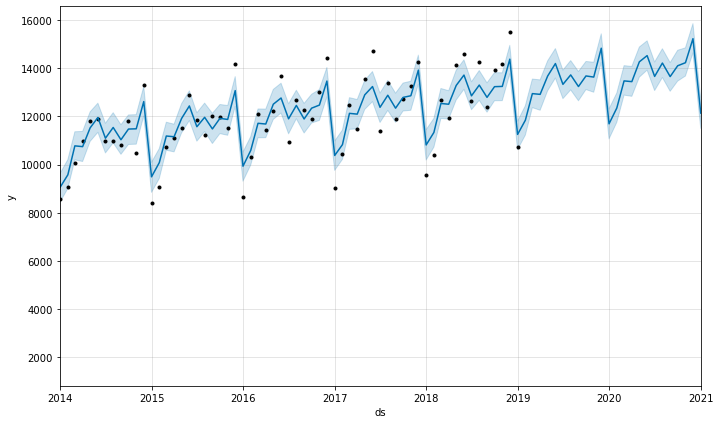

In [18]:
m.plot(results)
plt.xlim('2014-01-01','2021-01-01')

<AxesSubplot:xlabel='ds'>

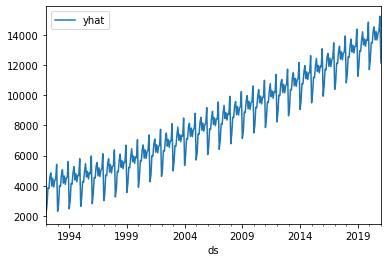

In [20]:
results.plot(x='ds',y='yhat')

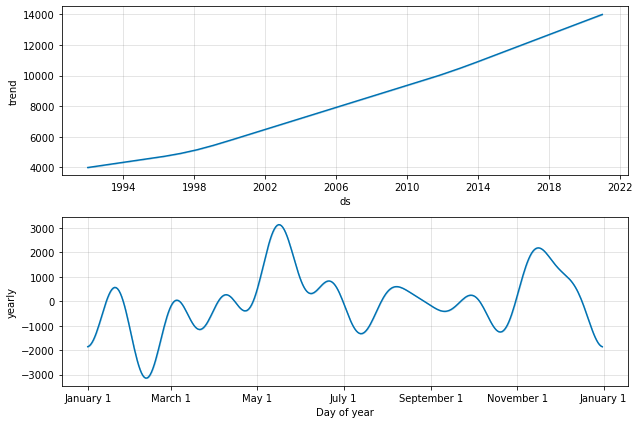

In [27]:
m.plot_components(results);